In [1]:
from epsilon_greedy import EpsilonGreedy
from optimistic_value import OptimisticValue
import matplotlib.pyplot as plt

# Epsilon Greedy

Idea is to use exploration (random move) with some probability which is Epsilon

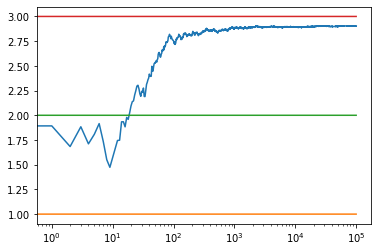

Avgs: [1.53547422 1.89259521 1.68375623 ... 2.90196237 2.90195581 2.90196112],
means: [0.9777748811673187, 2.014393177334445, 3.002404519335545]


In [2]:
c_avg1, means1 = EpsilonGreedy.run_experiment([1.0, 2.0, 3.0], 0.1, 100000)
print("Avgs: {},\nmeans: {}".format(c_avg1, means1))

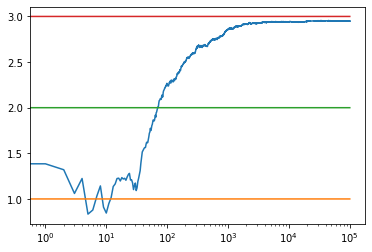

Avgs: [2.28668034 1.38505188 1.32001932 ... 2.94926857 2.94927373 2.94929018],
means: [1.0399170026307045, 1.9743242226943798, 2.9993855854094225]


In [3]:
c_avg2, means2 = EpsilonGreedy.run_experiment([1.0, 2.0, 3.0], 0.05, 100000)
print("Avgs: {},\nmeans: {}".format(c_avg2, means2))

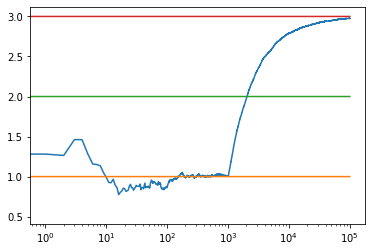

Avgs: [0.53146449 1.28089923 1.26450943 ... 2.97672856 2.97671299 2.97671538],
means: [1.035269664224148, 2.0074914139520628, 3.0063572161283503]


In [4]:
c_avg3, means3 = EpsilonGreedy.run_experiment([1.0, 2.0, 3.0], 0.01, 100000)
print("Avgs: {},\nmeans: {}".format(c_avg3, means3))

/home/dima/UCU/ReinforcementLearning/Repos/ReinforcementLearning/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


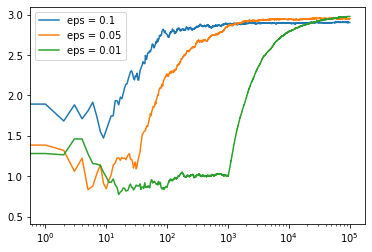

In [5]:
plt.plot(c_avg1, label='eps = 0.1')
plt.plot(c_avg2, label='eps = 0.05')
plt.plot(c_avg3, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

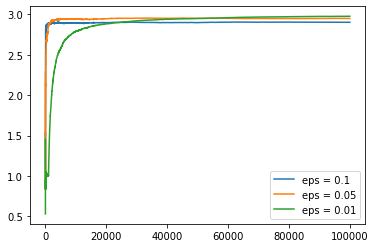

In [6]:
plt.plot(c_avg1, label='eps = 0.1')
plt.plot(c_avg2, label='eps = 0.05')
plt.plot(c_avg3, label='eps = 0.01')
plt.legend()
plt.show()

# Optimistic Initial Values

Idea is to guess some upper bound mean value of the slot machines and with respect to this use only greedy strategy. All bandits will start decrease their means untill one of the bandits, that corresponds to the slot machine with highest value, will stop decreasing and we will exploit only that bandit

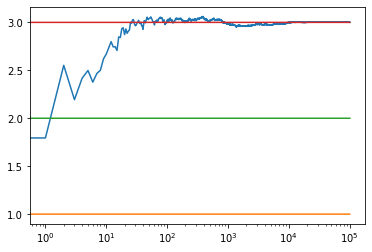

Avgs: [2.15381477 1.79445453 2.55212934 ... 3.00082748 3.00081735 3.00081028],
means: [2.1538147710721427, 1.4350942916461626, 3.0008344068484587]


In [7]:
c_avg_opt, means_opt = OptimisticValue.run_experiment([1.0, 2.0, 3.0], 10, 100000)
print("Avgs: {},\nmeans: {}".format(c_avg_opt, means_opt))

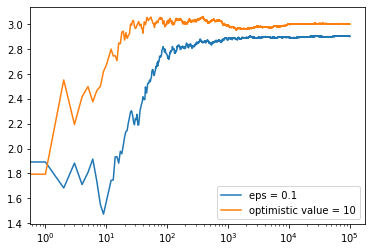

In [9]:
plt.plot(c_avg1, label='eps = 0.1')
plt.plot(c_avg_opt, label='optimistic value = 10')
plt.legend()
plt.xscale('log')
plt.show()

# UCB1

Approach is similar to `Optimistic Initial Values` with the difference that we use not just means to find the best bandit to act, but confidence intervals, by choosing the upper bound of the confidence interval: 

Chernoff-Hoeffding bound:

$P\{|\overline{X} - \mu \ge \epsilon | \} \le 2 exp \{ - 2 \epsilon ^ 2 N\}$

According to this bound, we use upper part of the interval:

$X_{UCB-j} = \overline{X}_j + \sqrt{2\frac{lnN}{N_j}}$